In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
import random
import scipy.cluster.hierarchy as shc

In [2]:
data =pd.read_csv("/Users/steafen/Desktop/data2.csv")
data.drop(['Wenshi','color'],axis=1,inplace=True)

In [3]:
data_K=data[data['Type']==0] # 筛选高钾类型
data_K

,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2,Type,Fenghua
0,69.33,0.00,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.00,0.39,0,0
2,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.00,0.00,0,0
3,61.71,0.00,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.00,0.00,0,0
4,65.88,0.00,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.00,0.36,0,0
5,61.58,0.00,10.95,7.35,1.77,7.50,2.62,3.27,0.00,0.00,0.94,0.06,0.00,0.47,0,0
6,67.65,0.00,7.37,0.00,1.98,11.15,2.39,2.51,0.20,1.38,4.18,0.11,0.00,0.00,0,0
7,59.81,0.00,7.68,5.41,1.73,10.05,6.04,2.18,0.35,0.97,4.50,0.12,0.00,0.00,0,0
8,92.63,0.00,0.00,1.07,0.00,1.98,0.17,3.24,0.00,0.00,0.61,0.00,0.00,0.00,0,1
11,95.02,0.00,0.59,0.62,0.00,1.32,0.32,1.55,0.00,0.00,0.35,0.00,0.00,0.00,0,1
12,96.77,0.00,0.92,0.21,0.00,0.81,0.26,0.84,0.00,0.00,0.00,0.00,0.00,0.00,0,1


In [4]:
data_K0=data_K[data_K['Fenghua']==0] # 筛选出高钾未分化
data_K1=data_K[data_K['Fenghua']==1] # 筛选出高钾已分化

In [5]:
data_Pb=data[data['Type']==1]
data_Pb0=data_Pb[data_Pb['Fenghua']==0]
data_Pb1=data_Pb[data_Pb['Fenghua']==1]
data_Pb0

,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2,Type,Fenghua
20,37.36,0.00,0.71,0.00,0.00,5.45,1.51,4.78,9.30,23.55,5.75,0.00,0.00,0.00,1,0
24,31.94,0.00,0.00,0.47,0.00,1.59,0.00,8.46,29.14,26.23,0.14,0.91,0.00,0.00,1,0
31,34.34,0.00,1.41,4.49,0.98,4.35,2.12,0.00,39.22,10.29,0.00,0.35,0.40,0.00,1,0
32,36.93,0.00,0.00,4.24,0.51,3.86,2.74,0.00,37.74,10.35,1.41,0.48,0.44,0.00,1,0
33,65.91,0.00,0.00,1.60,0.89,3.11,4.59,0.44,16.55,3.42,1.62,0.30,0.00,0.00,1,0
34,69.71,0.00,0.21,0.46,0.00,2.36,1.00,0.11,19.76,4.88,0.17,0.00,0.00,0.00,1,0
35,75.51,0.00,0.15,0.64,1.00,2.35,0.00,0.47,16.16,3.55,0.13,0.00,0.00,0.00,1,0
37,65.91,0.00,0.00,0.38,0.00,1.44,0.17,0.16,22.05,5.68,0.42,0.00,0.00,0.00,1,0
39,60.12,0.00,0.23,0.89,0.00,2.72,0.00,3.01,17.24,10.34,1.46,0.31,0.00,3.66,1,0
49,61.28,2.66,0.11,0.84,0.74,5.00,0.00,0.53,15.99,10.96,0.00,0.23,0.00,0.00,1,0


In [6]:
K0_std=data_K0.std() # 求标准差
K0_std[:]

SiO2       8.755099
Na2O       1.100903
K2O        3.920303
CaO        3.092478
MgO        0.676145
Al2O3      2.491509
Fe2O3      1.666694
CuO        1.659990
PbO        0.588987
BaO        0.982102
P2O5       1.433959
SrO        0.048399
SnO2       0.681273
SO2        0.185513
Type       0.000000
Fenghua    0.000000
dtype: float64

In [7]:
K1_std=data_K1.std()

In [8]:
Pb0_std=data_Pb0.std()

In [9]:
Pb1_std=data_Pb1.std()

In [10]:
df1=K0_std.to_frame()
col1=df1.values
index1=df1.index.tolist()
col1

array([[8.75509873],
       [1.10090321],
       [3.92030254],
       [3.09247804],
       [0.67614493],
       [2.49150922],
       [1.66669424],
       [1.65998973],
       [0.58898732],
       [0.98210195],
       [1.43395908],
       [0.0483986 ],
       [0.68127332],
       [0.18551321],
       [0.        ],
       [0.        ]])

In [11]:
df2=K1_std.to_frame()
col2=df2.values
index2=df2.index.tolist()

In [12]:
df3=Pb0_std.to_frame()
col3=df3.values
index3=df3.index.tolist()

In [13]:
df4=Pb1_std.to_frame()
col4=df4.values
index4=df4.index.tolist()

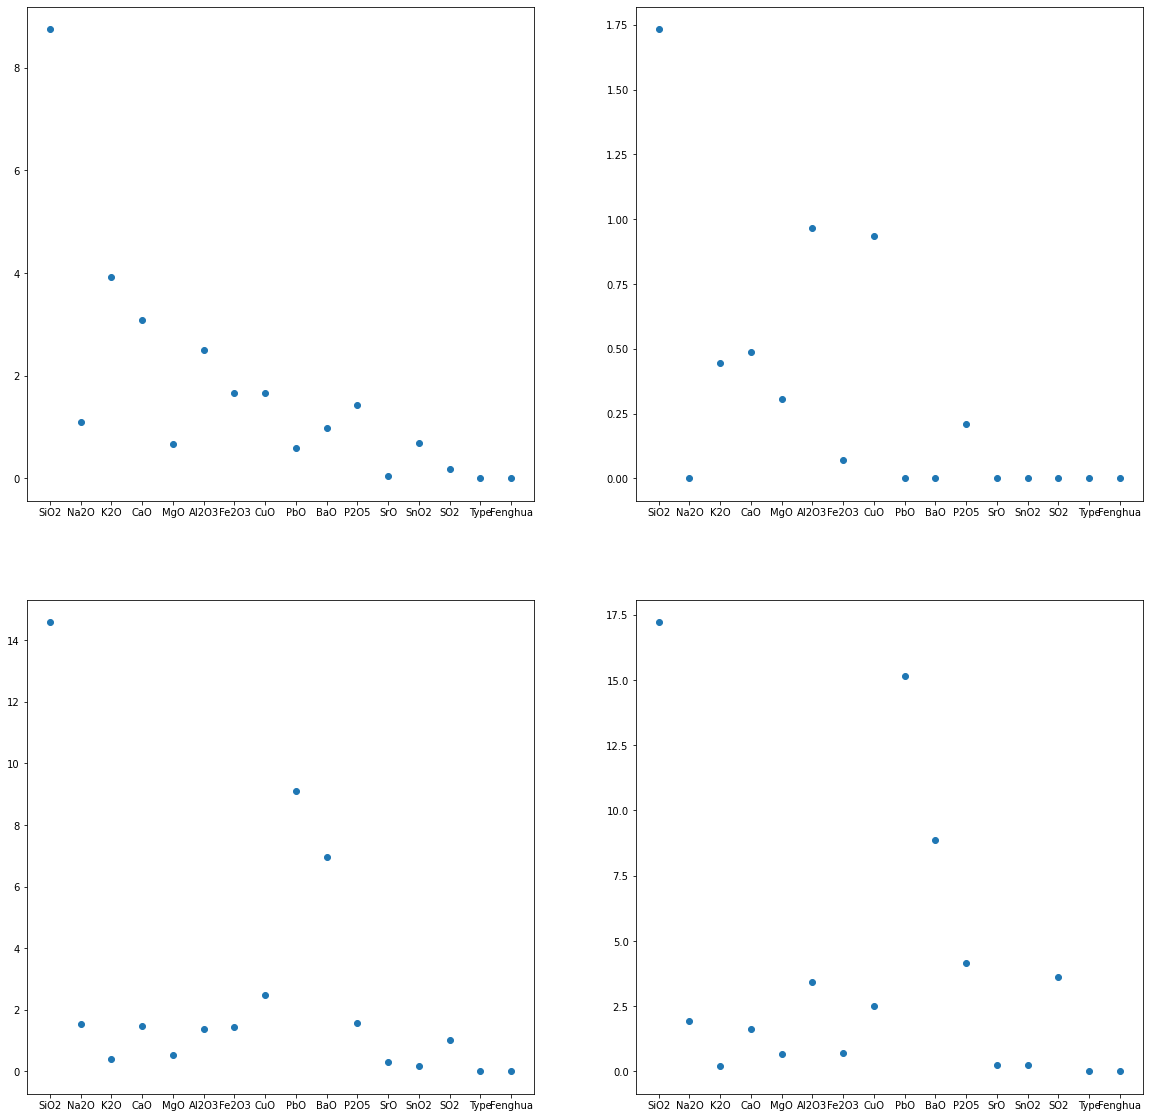

In [14]:
plt.figure(figsize=(20,20))
plt.subplot(221)  # 绘制标准差散点图
plt.scatter(x=index1,y=col1) # 高钾未风化
plt.subplot(222)
plt.scatter(x=index2,y=col2) # 高钾风化
plt.subplot(223)
plt.scatter(x=index3,y=col3) # 铅钡未风化
plt.subplot(224)
plt.scatter(x=index4,y=col4) # 铅钡风化

高钾未风化取**sio2** \\
高钾已风化取**sio2 Al2O3 CuO** \\
铅钡未风化取**SiO2 PbO BaO** \\
铅钡已风化取**SiO2 PbO** \\

In [15]:
data_K1

,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2,Type,Fenghua
8,92.63,0.0,0.00,1.07,0.00,1.98,0.17,3.24,0.0,0.0,0.61,0.0,0.0,0.0,0,1
11,95.02,0.0,0.59,0.62,0.00,1.32,0.32,1.55,0.0,0.0,0.35,0.0,0.0,0.0,0,1
12,96.77,0.0,0.92,0.21,0.00,0.81,0.26,0.84,0.0,0.0,0.00,0.0,0.0,0.0,0,1
14,94.29,0.0,1.01,0.72,0.00,1.46,0.29,1.65,0.0,0.0,0.15,0.0,0.0,0.0,0,1
22,92.35,0.0,0.74,1.66,0.64,3.50,0.35,0.55,0.0,0.0,0.21,0.0,0.0,0.0,0,1
28,92.72,0.0,0.00,0.94,0.54,2.51,0.20,1.54,0.0,0.0,0.36,0.0,0.0,0.0,0,1


In [17]:
train_K1=data_K1.loc[:,['SiO2','Al2O3','CuO']]

In [18]:
train_K1

,SiO2,Al2O3,CuO
8,92.63,1.98,3.24
11,95.02,1.32,1.55
12,96.77,0.81,0.84
14,94.29,1.46,1.65
22,92.35,3.50,0.55
28,92.72,2.51,1.54


In [19]:
# 进行数据归一化 确保数据的尺度相同
from sklearn.preprocessing import normalize
trainK1_scaled=normalize(train_K1)
trainK1_scaled=pd.DataFrame(trainK1_scaled,columns=train_K1.columns)

In [20]:
trainK1_scaled

,SiO2,Al2O3,CuO
0,0.999161,0.021357,0.034949
1,0.999771,0.013889,0.016309
2,0.999927,0.008370,0.008680
3,0.999727,0.015480,0.017494
4,0.999265,0.037871,0.005951
5,0.999496,0.027057,0.016601


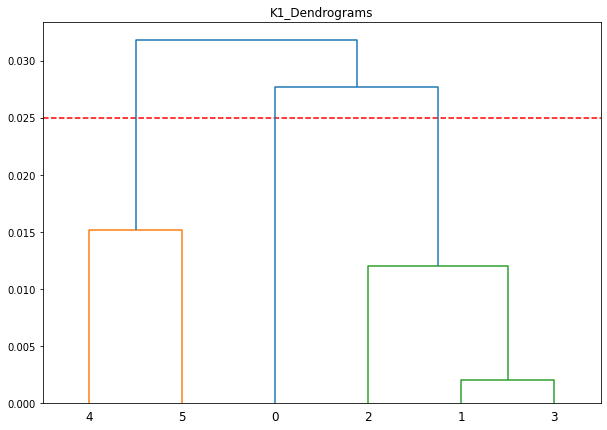

In [35]:
# 绘制树状图分析簇的数量
plt.figure(figsize=(10,7))
plt.title('K1_Dendrograms')

# 决定阈值为0.03 切断树状图
plt.axhline(y=0.025,color='r',linestyle='--')
dend_K1=shc.dendrogram(shc.linkage(trainK1_scaled,method='ward'))

In [37]:
# 使用层次聚类进行分析
from sklearn.cluster import AgglomerativeClustering
K1_cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
K1_cluster.fit_predict(trainK1_scaled)

array([2, 1, 1, 1, 0, 0])

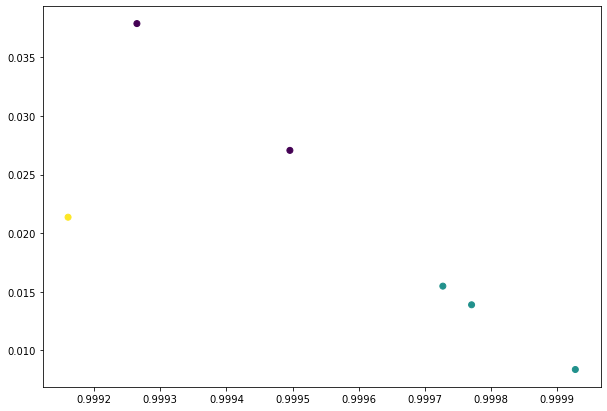

In [38]:
plt.figure(figsize=(10,7))
plt.scatter(trainK1_scaled['SiO2'],trainK1_scaled['Al2O3'],c=K1_cluster.labels_)

In [26]:
from mpl_toolkits.mplot3d import Axes3D

/var/folders/v3/nj7n2g_96_j8fj8mnl0nsb5c0000gn/T/ipykernel_52000/2076991951.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax_K1 = Axes3D(fig_K1)


NameError: name 'K1_cluster' is not defined

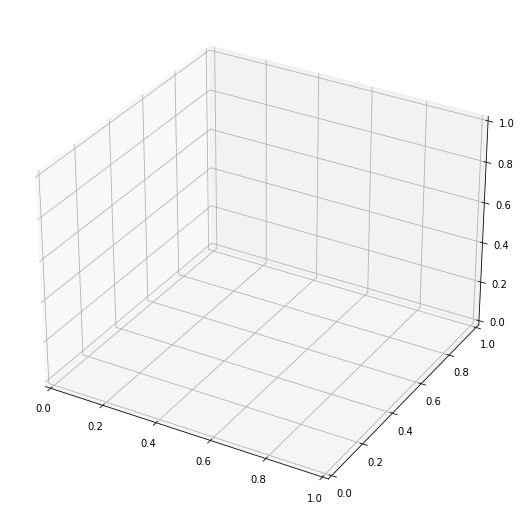

In [27]:
fig_K1 = plt.figure(figsize=(10,7))
ax_K1 = Axes3D(fig_K1)
ax_K1.scatter(trainK1_scaled['SiO2'],trainK1_scaled['Al2O3'],trainK1_scaled['CuO'],c=K1_cluster.labels_)


In [76]:
# 对铅钡已风化进行层次聚类
data_Pb1

,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2,Type,Fenghua
1,36.28,0.00,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.00,0.00,1,1
9,20.14,0.00,0.00,1.48,0.00,1.34,0.00,10.41,28.68,31.23,3.59,0.37,0.00,2.58,1,1
10,4.61,0.00,0.00,3.19,0.00,1.11,0.00,3.14,32.45,30.62,7.56,0.53,0.00,15.03,1,1
13,33.59,0.00,0.21,3.51,0.71,2.69,0.00,4.93,25.39,14.61,9.38,0.37,0.00,0.00,1,1
19,29.64,0.00,0.00,2.93,0.59,3.57,1.33,3.51,42.82,5.35,8.83,0.19,0.00,0.00,1,1
23,53.79,7.92,0.00,0.50,0.71,1.42,0.00,2.99,16.98,11.86,0.00,0.33,0.00,0.00,1,1
25,50.61,2.31,0.00,0.63,0.00,1.90,1.55,1.12,31.90,6.65,0.19,0.20,0.00,0.00,1,1
26,19.79,0.00,0.00,1.44,0.00,0.70,0.00,10.57,29.53,32.25,3.13,0.45,0.00,1.96,1,1
27,3.72,0.00,0.40,3.01,0.00,1.18,0.00,3.60,29.92,35.45,6.04,0.62,0.00,15.95,1,1
29,68.08,0.00,0.26,1.34,1.00,4.70,0.41,0.33,17.14,4.04,1.04,0.12,0.23,0.00,1,1


In [78]:
train_Pb1=data_Pb1.loc[:,['SiO2','PbO']]

In [79]:
train_Pb1

,SiO2,PbO
1,36.28,47.43
9,20.14,28.68
10,4.61,32.45
13,33.59,25.39
19,29.64,42.82
23,53.79,16.98
25,50.61,31.90
26,19.79,29.53
27,3.72,29.92
29,68.08,17.14


In [80]:
# 进行数据归一化 确保数据的尺度相同
trainPb1_scaled=normalize(train_Pb1)
trainPb1_scaled=pd.DataFrame(trainPb1_scaled,columns=train_Pb1.columns)

In [81]:
trainPb1_scaled

,SiO2,PbO
0,0.607556,0.794277
1,0.574687,0.818373
2,0.140652,0.990059
3,0.797743,0.602998
4,0.569150,0.822234
5,0.953615,0.301030
6,0.845973,0.533226
7,0.556711,0.830706
8,0.123382,0.992359
9,0.969739,0.244144


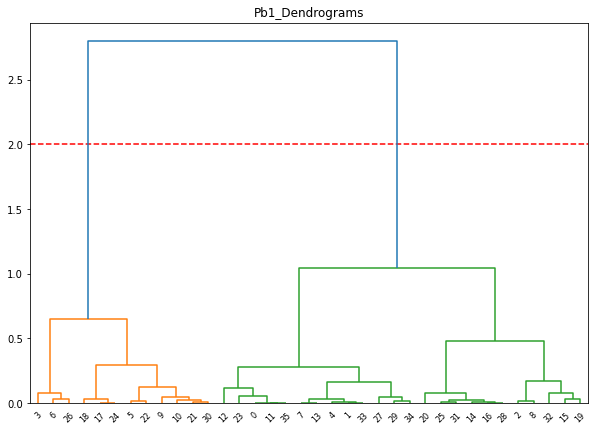

In [85]:
# 绘制树状图分析簇的数量
plt.figure(figsize=(10,7))
plt.title('Pb1_Dendrograms')
# 决定阈值为2 切断树状图
plt.axhline(y=2,color='r',linestyle='--')
dend_K1=shc.dendrogram(shc.linkage(trainPb1_scaled,method='ward'))

In [91]:
# 使用层次聚类进行分析
Pb1_cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
Pb1_cluster.fit_predict(trainPb1_scaled)

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

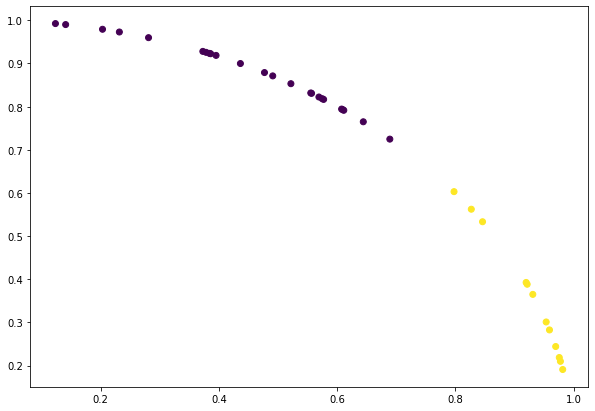

In [92]:
plt.figure(figsize=(10,7))
plt.scatter(trainPb1_scaled['SiO2'],trainPb1_scaled['PbO'],c=Pb1_cluster.labels_)

In [93]:
# 对铅钡未风化做聚类分析
data_Pb0

,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2,Type,Fenghua
20,37.36,0.00,0.71,0.00,0.00,5.45,1.51,4.78,9.30,23.55,5.75,0.00,0.00,0.00,1,0
24,31.94,0.00,0.00,0.47,0.00,1.59,0.00,8.46,29.14,26.23,0.14,0.91,0.00,0.00,1,0
31,34.34,0.00,1.41,4.49,0.98,4.35,2.12,0.00,39.22,10.29,0.00,0.35,0.40,0.00,1,0
32,36.93,0.00,0.00,4.24,0.51,3.86,2.74,0.00,37.74,10.35,1.41,0.48,0.44,0.00,1,0
33,65.91,0.00,0.00,1.60,0.89,3.11,4.59,0.44,16.55,3.42,1.62,0.30,0.00,0.00,1,0
34,69.71,0.00,0.21,0.46,0.00,2.36,1.00,0.11,19.76,4.88,0.17,0.00,0.00,0.00,1,0
35,75.51,0.00,0.15,0.64,1.00,2.35,0.00,0.47,16.16,3.55,0.13,0.00,0.00,0.00,1,0
37,65.91,0.00,0.00,0.38,0.00,1.44,0.17,0.16,22.05,5.68,0.42,0.00,0.00,0.00,1,0
39,60.12,0.00,0.23,0.89,0.00,2.72,0.00,3.01,17.24,10.34,1.46,0.31,0.00,3.66,1,0
49,61.28,2.66,0.11,0.84,0.74,5.00,0.00,0.53,15.99,10.96,0.00,0.23,0.00,0.00,1,0


In [95]:
train_Pb0=data_Pb0.loc[:,['SiO2','PbO','BaO']]

In [96]:
train_Pb0

,SiO2,PbO,BaO
20,37.36,9.30,23.55
24,31.94,29.14,26.23
31,34.34,39.22,10.29
32,36.93,37.74,10.35
33,65.91,16.55,3.42
34,69.71,19.76,4.88
35,75.51,16.16,3.55
37,65.91,22.05,5.68
39,60.12,17.24,10.34
49,61.28,15.99,10.96


In [97]:
# 进行数据归一化 确保数据的尺度相同
trainPb0_scaled=normalize(train_Pb0)
trainPb0_scaled=pd.DataFrame(trainPb0_scaled,columns=train_Pb0.columns)

In [98]:
trainPb0_scaled

,SiO2,PbO,BaO
0,0.827801,0.206064,0.521807
1,0.631601,0.576232,0.518688
2,0.646278,0.738120,0.193658
3,0.686335,0.701388,0.192352
4,0.968665,0.243232,0.050263
5,0.959920,0.272099,0.067199
6,0.976826,0.209052,0.045924
7,0.945186,0.316209,0.081454
8,0.948384,0.271959,0.163112
9,0.953431,0.248782,0.170522


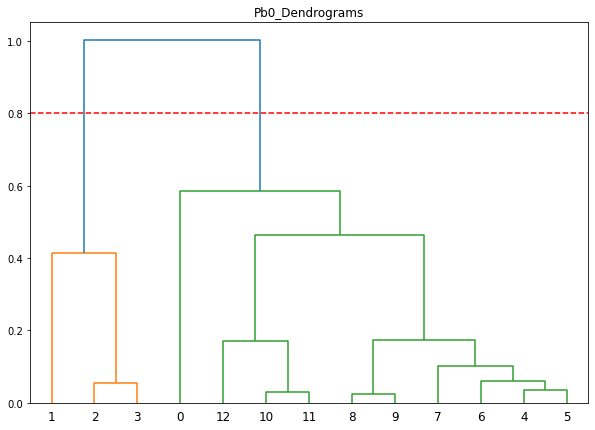

In [100]:
# 绘制树状图分析簇的数量
plt.figure(figsize=(10,7))
plt.title('Pb0_Dendrograms')
# 决定阈值为2 切断树状图
plt.axhline(y=0.8,color='r',linestyle='--')
dend_K1=shc.dendrogram(shc.linkage(trainPb0_scaled,method='ward'))

In [236]:
# 使用层次聚类进行分析
Pb0_cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
Pb0_cluster.fit_predict(trainPb0_scaled)

array([2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

/var/folders/v3/nj7n2g_96_j8fj8mnl0nsb5c0000gn/T/ipykernel_48187/4232501499.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax_Pb0 = Axes3D(fig_Pb0)


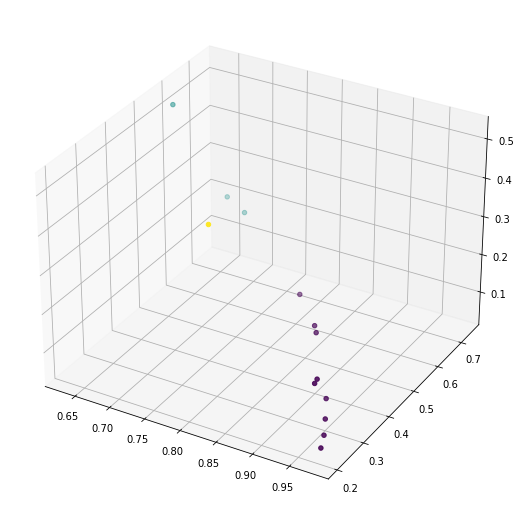

In [237]:
fig_Pb0 = plt.figure(figsize=(10,7))
ax_Pb0 = Axes3D(fig_Pb0)
ax_Pb0.scatter(trainPb0_scaled['SiO2'],trainPb0_scaled['PbO'],trainPb0_scaled['BaO'],c=Pb0_cluster.labels_)


In [124]:
data_K0

,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2,Type,Fenghua
0,69.33,0.00,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.00,0.39,0,0
2,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.00,0.00,0,0
3,61.71,0.00,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.00,0.00,0,0
4,65.88,0.00,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.00,0.36,0,0
5,61.58,0.00,10.95,7.35,1.77,7.50,2.62,3.27,0.00,0.00,0.94,0.06,0.00,0.47,0,0
6,67.65,0.00,7.37,0.00,1.98,11.15,2.39,2.51,0.20,1.38,4.18,0.11,0.00,0.00,0,0
7,59.81,0.00,7.68,5.41,1.73,10.05,6.04,2.18,0.35,0.97,4.50,0.12,0.00,0.00,0,0
15,59.01,0.00,12.53,8.70,0.00,6.16,2.88,4.73,0.00,0.00,1.27,0.00,0.00,0.00,0,0
16,62.47,3.38,12.28,8.23,0.66,9.23,0.50,0.47,1.62,0.00,0.16,0.00,0.00,0.00,0,0
17,65.18,2.10,14.52,8.27,0.52,6.18,0.42,1.07,0.11,0.00,0.00,0.04,0.00,0.00,0,0


In [136]:
train_K0=data_K0.loc[:,'SiO2']#.values
train_K0
#train_K0=train_K0.reshape(1,-1)

0     69.33
2     87.05
3     61.71
4     65.88
5     61.58
6     67.65
7     59.81
15    59.01
16    62.47
17    65.18
18    79.46
21    76.68
Name: SiO2, dtype: float64

In [241]:
# 轮廓系数评估

metrics.silhouette_score(train_K1,K1_cluster.labels_,metric='euclidean') # 高钾已风化

0.17442862428040365

In [238]:
metrics.silhouette_score(train_Pb0,Pb0_cluster.labels_,metric='euclidean') # 铅钡未风化

0.45973090784381276

In [112]:
metrics.silhouette_score(train_Pb1,Pb1_cluster.labels_,metric='euclidean') # 铅钡已风化

0.587810058296897

In [113]:
metrics.silhouette_score?

In [242]:
# kmeans聚类

# 高钾已风化
km_K1=KMeans(n_clusters=3)
km_K1.fit(trainK1_scaled)
km_K1.cluster_centers_

array([[0.99980832, 0.01257943, 0.01416093],
       [0.99949604, 0.02705711, 0.01660078],
       [0.99916088, 0.02135743, 0.03494852],
       [0.9992649 , 0.03787144, 0.00595123]])

In [141]:
km_K1.labels_

array([0, 2, 2, 2, 1, 1], dtype=int32)

In [142]:
# 铅钡未风化
km_Pb0=KMeans(n_clusters=2)
km_Pb0.fit(trainPb0_scaled)
km_Pb0.cluster_centers_

array([[0.92922427, 0.29046356, 0.15804013],
       [0.69672645, 0.64208551, 0.25953699]])

In [143]:
# 铅钡已风化
km_Pb1=KMeans(n_clusters=2)
km_Pb1.fit(trainPb1_scaled)
km_Pb1.cluster_centers_

array([[0.92172147, 0.35762762],
       [0.45068028, 0.87511739]])

In [243]:
print(metrics.silhouette_score(train_K1,km_K1.labels_,metric='euclidean'))
print(metrics.silhouette_score(train_Pb0,km_Pb0.labels_,metric='euclidean'))
print(metrics.silhouette_score(train_Pb1,km_Pb1.labels_,metric='euclidean'))

0.17442862428040365
0.4401812670526096
0.587810058296897


In [146]:
train_K1

,SiO2,Al2O3,CuO
8,92.63,1.98,3.24
11,95.02,1.32,1.55
12,96.77,0.81,0.84
14,94.29,1.46,1.65
22,92.35,3.50,0.55
28,92.72,2.51,1.54


In [160]:
K1_sio2=train_K1.loc[:,'SiO2'].tolist()
train_K1.index

Int64Index([8, 11, 12, 14, 22, 28], dtype='int64')

In [166]:
mean_K1_sio2=np.mean(K1_sio2)
K1_sio2_noise=[]
K1_sio2_noise

[]

In [168]:
for i  in range(len(K1_sio2)):
    K1_sio2_noise.append(K1_sio2[i]+random.uniform(-mean_K1_sio2*0.05,mean_K1_sio2*0.05))
K1_sio2_noise     # 获取带噪声的数据 sio2               
    

[91.67271090156747,
 96.60765207151383,
 97.094929616494,
 92.74933142232055,
 90.17133335659892,
 95.05326082856487]

In [169]:
K1_al=train_K1.loc[:,'Al2O3'].tolist()
K1_cuo=train_K1.loc[:,'CuO'].tolist()

mean_K1_al=np.mean(K1_al)
K1_al_noise=[]

mean_K1_cuo=np.mean(K1_cuo)
K1_cuo_noise=[]

In [170]:
for i  in range(len(K1_al)):
    K1_al_noise.append(K1_al[i]+random.uniform(-mean_K1_al*0.05,mean_K1_al*0.05))
print(K1_al_noise)  # 噪音al2o3

for i  in range(len(K1_cuo)):
    K1_cuo_noise.append(K1_cuo[i]+random.uniform(-mean_K1_cuo*0.05,mean_K1_cuo*0.05))
print(K1_cuo_noise )  # 噪音cuo

[2.0265519189017906, 1.2417126277130113, 0.8947659384580889, 1.4034847547047122, 3.5846095460730374, 2.4636799806946588]
[3.282654824944996, 1.586072028114187, 0.7721034663775962, 1.7186091896935527, 0.5051286152648441, 1.5331629178082888]


In [173]:
col=['SiO2','Al2O3','CuO']
K1_dict={'SiO2':K1_sio2_noise,'Al2O3':K1_al_noise,'CuO':K1_cuo_noise}
K1_noise=pd.DataFrame(K1_dict)
K1_noise

,SiO2,Al2O3,CuO
0,91.672711,2.026552,3.282655
1,96.607652,1.241713,1.586072
2,97.094930,0.894766,0.772103
3,92.749331,1.403485,1.718609
4,90.171333,3.584610,0.505129
5,95.053261,2.463680,1.533163


In [178]:
rate_K1=sum(km_K1.predict(K1_noise)==km_K1.predict(trainK1_scaled))/len(K1_noise)
rate_K1

1.0

In [188]:
train_Pb1

,SiO2,PbO
1,36.28,47.43
9,20.14,28.68
10,4.61,32.45
13,33.59,25.39
19,29.64,42.82
23,53.79,16.98
25,50.61,31.90
26,19.79,29.53
27,3.72,29.92
29,68.08,17.14


In [203]:
Pb1_si=train_Pb1.loc[:,'SiO2'].tolist()
Pb1_pbo=train_Pb1.loc[:,'PbO'].tolist()

mean_Pb1_si=np.mean(Pb1_si)
Pb1_si_noise=[]

mean_Pb1_pbo=np.mean(Pb1_pbo)
Pb1_pbo_noise=[]
len(Pb1_si)

36

In [204]:
for i  in range(36):
    Pb1_si_noise.append(Pb1_si[i]+random.uniform(-mean_Pb1_si*0.1,mean_Pb1_si*0.1))
print(len(Pb1_si_noise))  # 噪音sio2

for i  in range(36):
    Pb1_pbo_noise.append(Pb1_pbo[i]+random.uniform(-mean_Pb1_pbo*0.1,mean_Pb1_pbo*0.1))
print(len(Pb1_pbo_noise )  )# 噪音pbo

36
36


In [205]:
col=['SiO2','PbO']
Pb1_dict={'SiO2':Pb1_si_noise,'PbO':Pb1_pbo_noise}
Pb1_noise=pd.DataFrame(Pb1_dict)
Pb1_noise

,SiO2,PbO
0,33.535330,45.922568
1,19.389060,25.143347
2,7.720256,34.186686
3,32.909546,29.049626
4,32.624418,40.407597
5,53.096255,17.578773
6,48.744123,32.723735
7,18.511188,30.897854
8,1.692061,28.092824
9,68.626879,13.471306


In [206]:
rate_Pb1=sum(km_Pb1.predict(Pb1_noise)==km_Pb1.predict(trainPb1_scaled))/len(Pb1_noise)
rate_Pb1

1.0

In [208]:
# 对表三进行亚类划分

data=pd.read_csv("/Users/steafen/Desktop/data4.csv")
data

,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2,Type,Fenghua
0,78.45,0.0,0.00,6.08,1.86,7.23,2.15,2.11,0.00,0.00,1.06,0.03,0.00,0.51,0.0,0.0
1,37.75,0.0,0.00,7.63,0.00,2.33,0.00,0.00,34.30,0.00,14.27,0.00,0.00,0.00,1.0,1.0
2,31.95,0.0,1.36,7.19,0.81,2.93,7.06,0.21,39.58,4.69,2.68,0.52,0.00,0.00,1.0,0.0
3,35.47,0.0,0.79,2.89,1.05,7.07,6.45,0.96,24.28,8.31,8.45,0.28,0.00,0.00,1.0,0.0
4,64.29,1.2,0.37,1.64,2.34,12.75,0.81,0.94,12.23,2.16,0.19,0.21,0.49,0.00,1.0,1.0
5,93.17,0.0,1.35,0.64,0.21,1.52,0.27,1.73,0.00,0.00,0.21,0.00,0.00,0.00,0.0,1.0
6,90.83,0.0,0.98,1.12,0.00,5.06,0.24,1.17,0.00,0.00,0.13,0.00,0.00,0.11,0.0,1.0
7,51.12,0.0,0.23,0.89,0.00,2.12,0.00,9.01,21.24,11.34,1.46,0.31,0.00,2.26,1.0,0.0


In [212]:
# 取高钾已风化
data_K=data[data['Type']==0]
data_K

,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2,Type,Fenghua
0,78.45,0.0,0.00,6.08,1.86,7.23,2.15,2.11,0.0,0.0,1.06,0.03,0.0,0.51,0.0,0.0
5,93.17,0.0,1.35,0.64,0.21,1.52,0.27,1.73,0.0,0.0,0.21,0.00,0.0,0.00,0.0,1.0
6,90.83,0.0,0.98,1.12,0.00,5.06,0.24,1.17,0.0,0.0,0.13,0.00,0.0,0.11,0.0,1.0


In [213]:
data_K1=data_K[data_K['Fenghua']==1]

In [214]:
data_K1

,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2,Type,Fenghua
5,93.17,0.0,1.35,0.64,0.21,1.52,0.27,1.73,0.0,0.0,0.21,0.0,0.0,0.00,0.0,1.0
6,90.83,0.0,0.98,1.12,0.00,5.06,0.24,1.17,0.0,0.0,0.13,0.0,0.0,0.11,0.0,1.0


In [215]:
test_K1=data_K1.loc[:,['SiO2','Al2O3','CuO']]

In [221]:
test_K1

,SiO2,Al2O3,CuO
5,93.17,1.52,1.73
6,90.83,5.06,1.17


In [223]:
km_K1.predict(test_K1)

array([2, 1], dtype=int32)

In [224]:
# 取铅钡未风化

data_Pb=data[data['Type']==1]

In [225]:
data_Pb0=data_Pb[data_Pb['Fenghua']==0]

In [226]:
data_Pb0

,SiO2,Na2O,K2O,CaO,MgO,Al2O3,Fe2O3,CuO,PbO,BaO,P2O5,SrO,SnO2,SO2,Type,Fenghua
2,31.95,0.0,1.36,7.19,0.81,2.93,7.06,0.21,39.58,4.69,2.68,0.52,0.0,0.00,1.0,0.0
3,35.47,0.0,0.79,2.89,1.05,7.07,6.45,0.96,24.28,8.31,8.45,0.28,0.0,0.00,1.0,0.0
7,51.12,0.0,0.23,0.89,0.00,2.12,0.00,9.01,21.24,11.34,1.46,0.31,0.0,2.26,1.0,0.0


In [227]:
test_Pb0=data_Pb0.loc[:,['SiO2','PbO','BaO']]

In [228]:
test_Pb0

,SiO2,PbO,BaO
2,31.95,39.58,4.69
3,35.47,24.28,8.31
7,51.12,21.24,11.34


In [229]:
km_Pb0.predict(test_Pb0)

array([1, 1, 0], dtype=int32)

In [233]:
# 取铅钡已风化
data_Pb1=data_Pb[data_Pb['Fenghua']==1]
test_Pb1=data_Pb1.loc[:,['SiO2','PbO']]

In [234]:
test_Pb1

,SiO2,PbO
1,37.75,34.30
4,64.29,12.23


In [235]:
km_Pb1.predict(test_Pb1)

array([0, 0], dtype=int32)